## Predict basketball player efficiency ratings by using machine learning

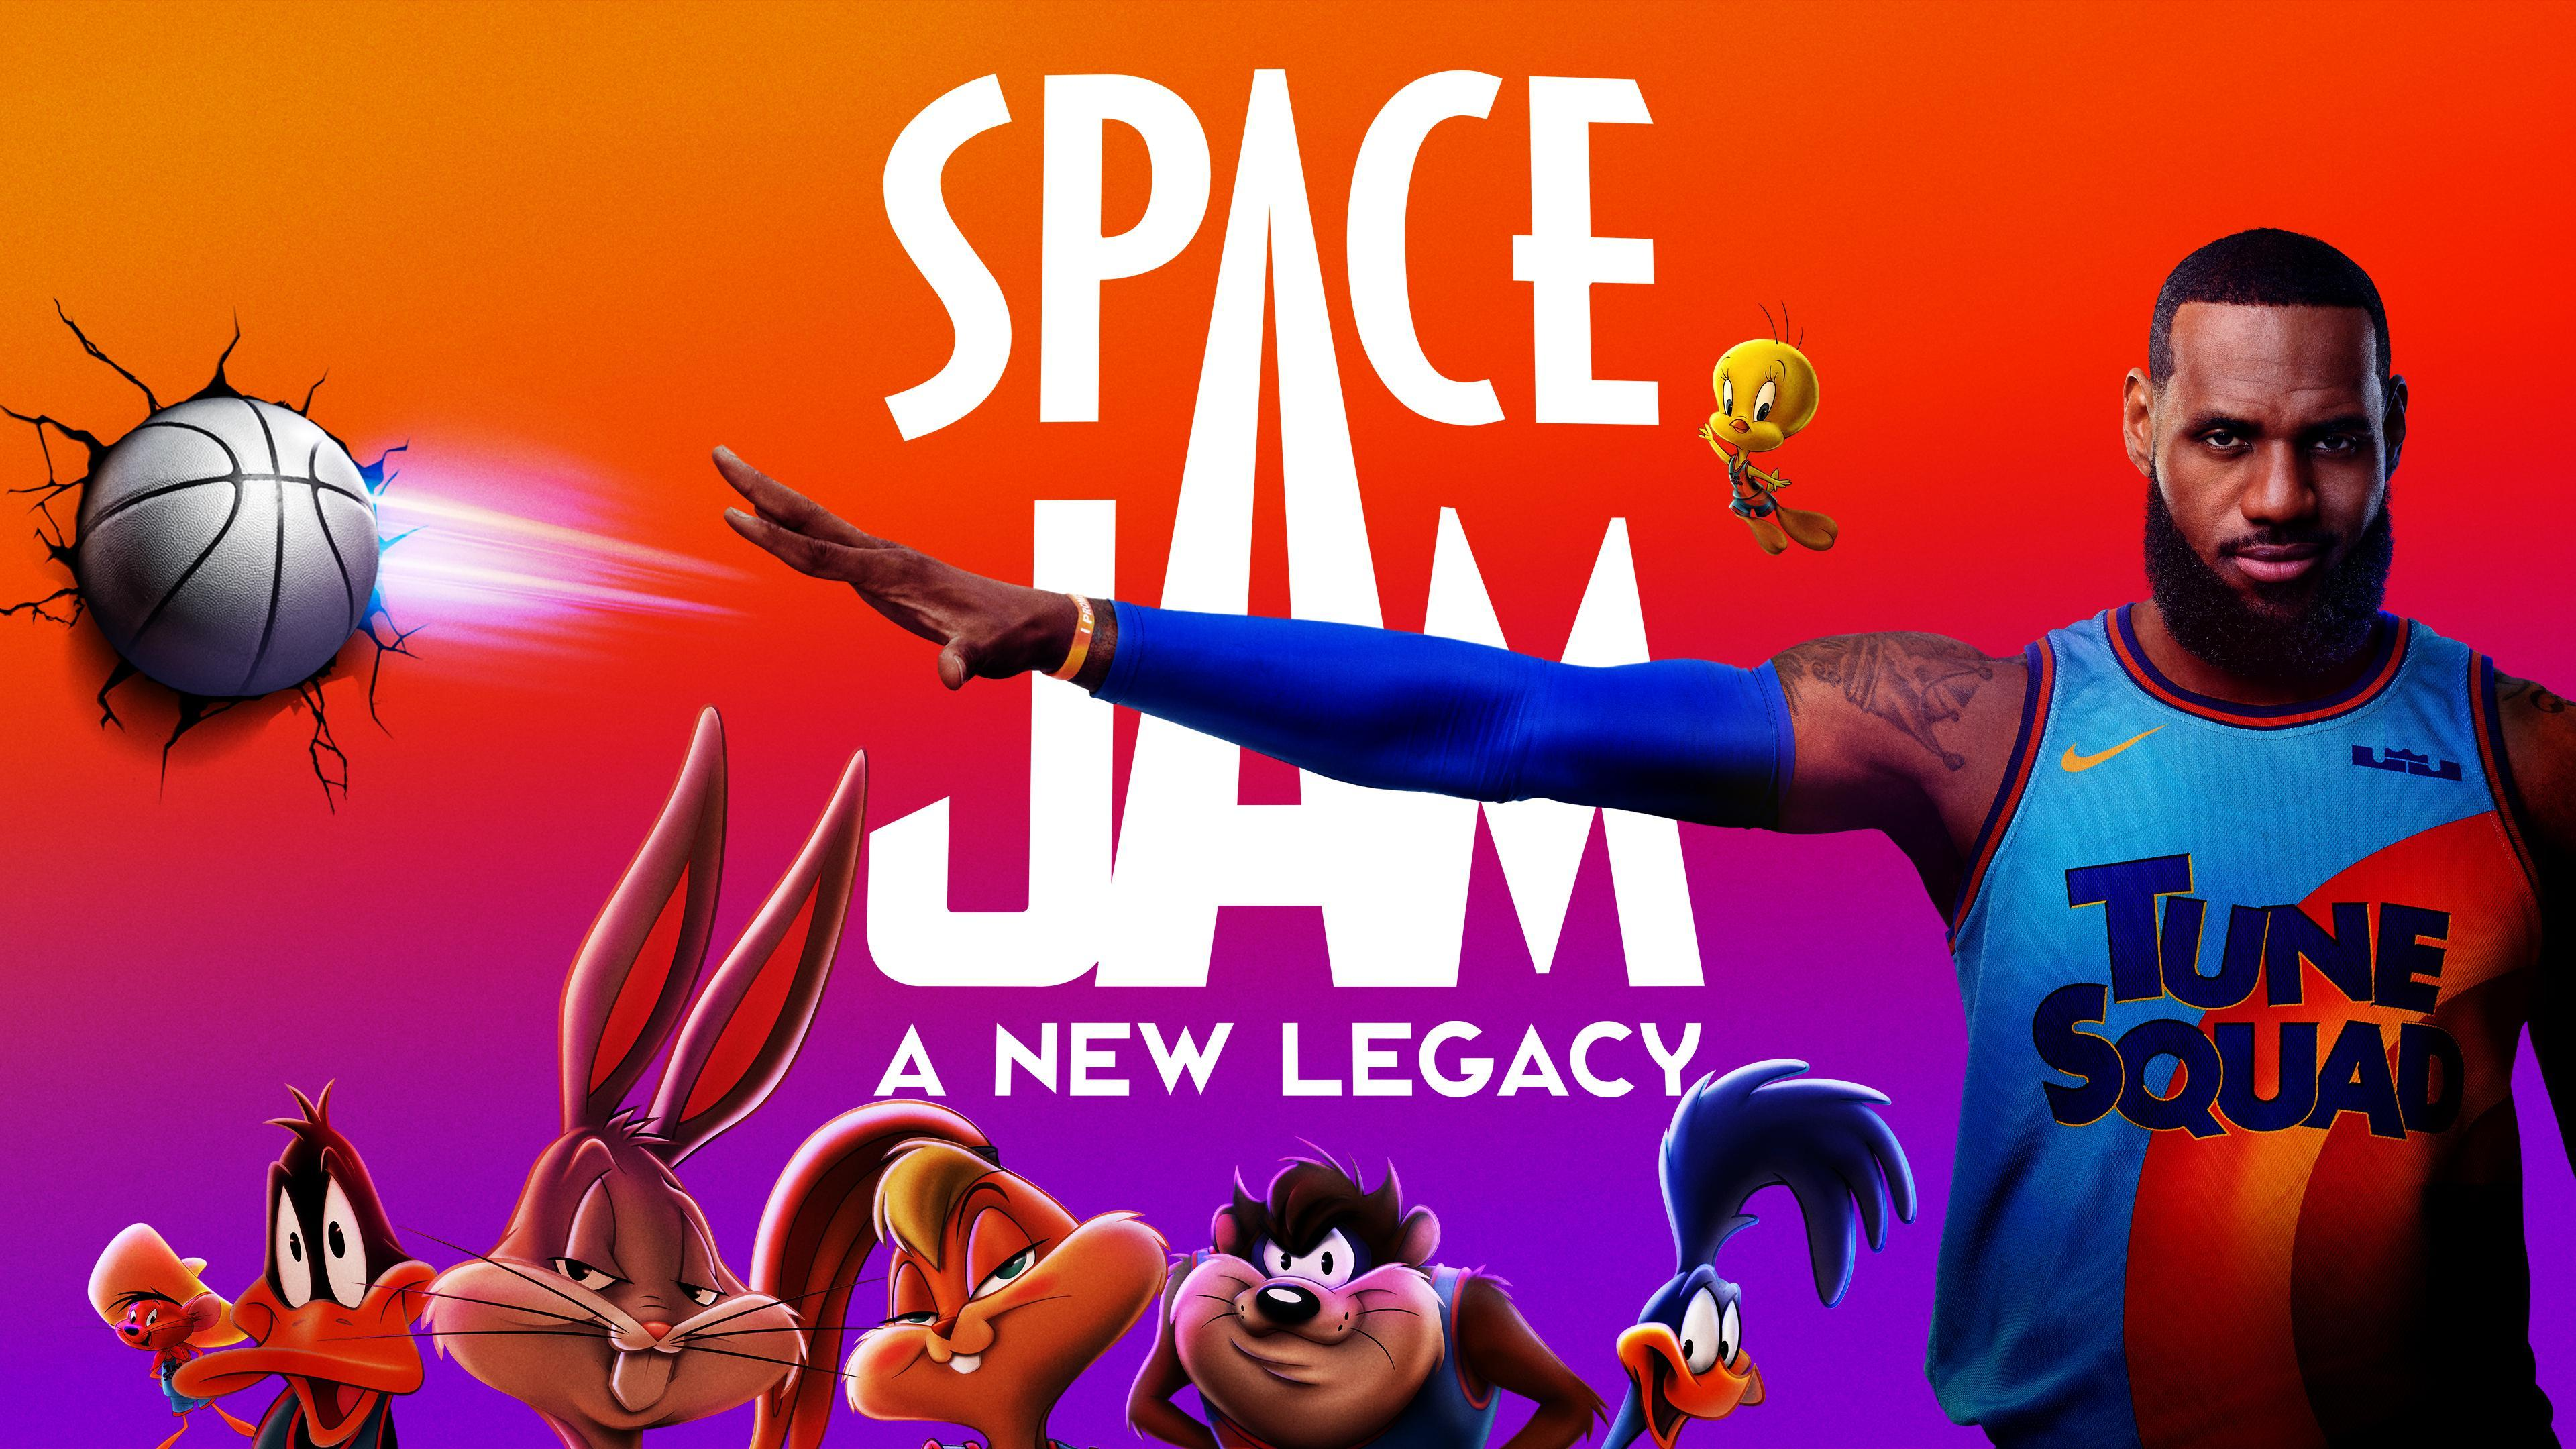

Dataset: Anonymized data from real and animated basketball players in the upcoming film Space Jam: A New Legacy

Here I will:

-Use Python, pandas, and Jupiter Notebook

-Cleanse and manipulate data that requires critical analysis.

-Use machine learning to cleanse and complete data.

-Prepare data to be used for multiple customer-facing purposes.


In [4]:
import pandas as pd
# Import data from the CSV file to a pandas DataFrame.
player_df = pd.read_csv('player_data.csv')

In [5]:
# Print out the first five rows of the player_df DataFrame.
player_df.head()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


In [3]:
# %%
# Total up the number of NaN values in each row of the DataFrame.
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

In [6]:
# Print out the information about the DataFrame.
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


In [7]:
# Drop columns that have no values.
player_df.dropna(axis='columns', inplace=True, how='all')
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [8]:
# Drop rows that have no values.
player_df.dropna(inplace=True, how='all')
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [9]:
# Show the entire DataFrame.
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


In [10]:
# Drop all rows that don't have at least 12 non-NaN values.
player_df.dropna(inplace=True, thresh=12)
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

In [11]:
# Renumber the DataFrame index to account for the dropped rows.
player_df.reset_index(drop=True, inplace=True)
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   points       42 non-null     float64
 2   possessions  42 non-null     float64
 3   team_pace    42 non-null     float64
 4   GP           36 non-null     float64
 5   MPG          37 non-null     float64
 6   TS%          42 non-null     float64
 7   AST          42 non-null     float64
 8   TO           42 non-null     float64
 9   USG          42 non-null     float64
 10  ORR          42 non-null     float64
 11  DRR          42 non-null     float64
 12  REBR         42 non-null     float64
 13  PER          33 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.7 KB


In [12]:
#Check outliers
player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


The mean for all 42 players is 1592.38 points. But look at the numbers for min (183), 25% (1390.75), 50% (1680.0), 75% (1826.25), and max (2062). Here, the min points (183) might be an outlier. You can use box plots to visualize the values and determine possible outliers.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Now I want to:

-Create a list of the column names, excluding ID. Use the list to find specific values within each row.

-Create a matrix of subplots so you have one figure that shows all 13 columns.

-Add padding around the subplots to make them easier to read.

-Create a box plot based on the data in each column, across all of the rows.

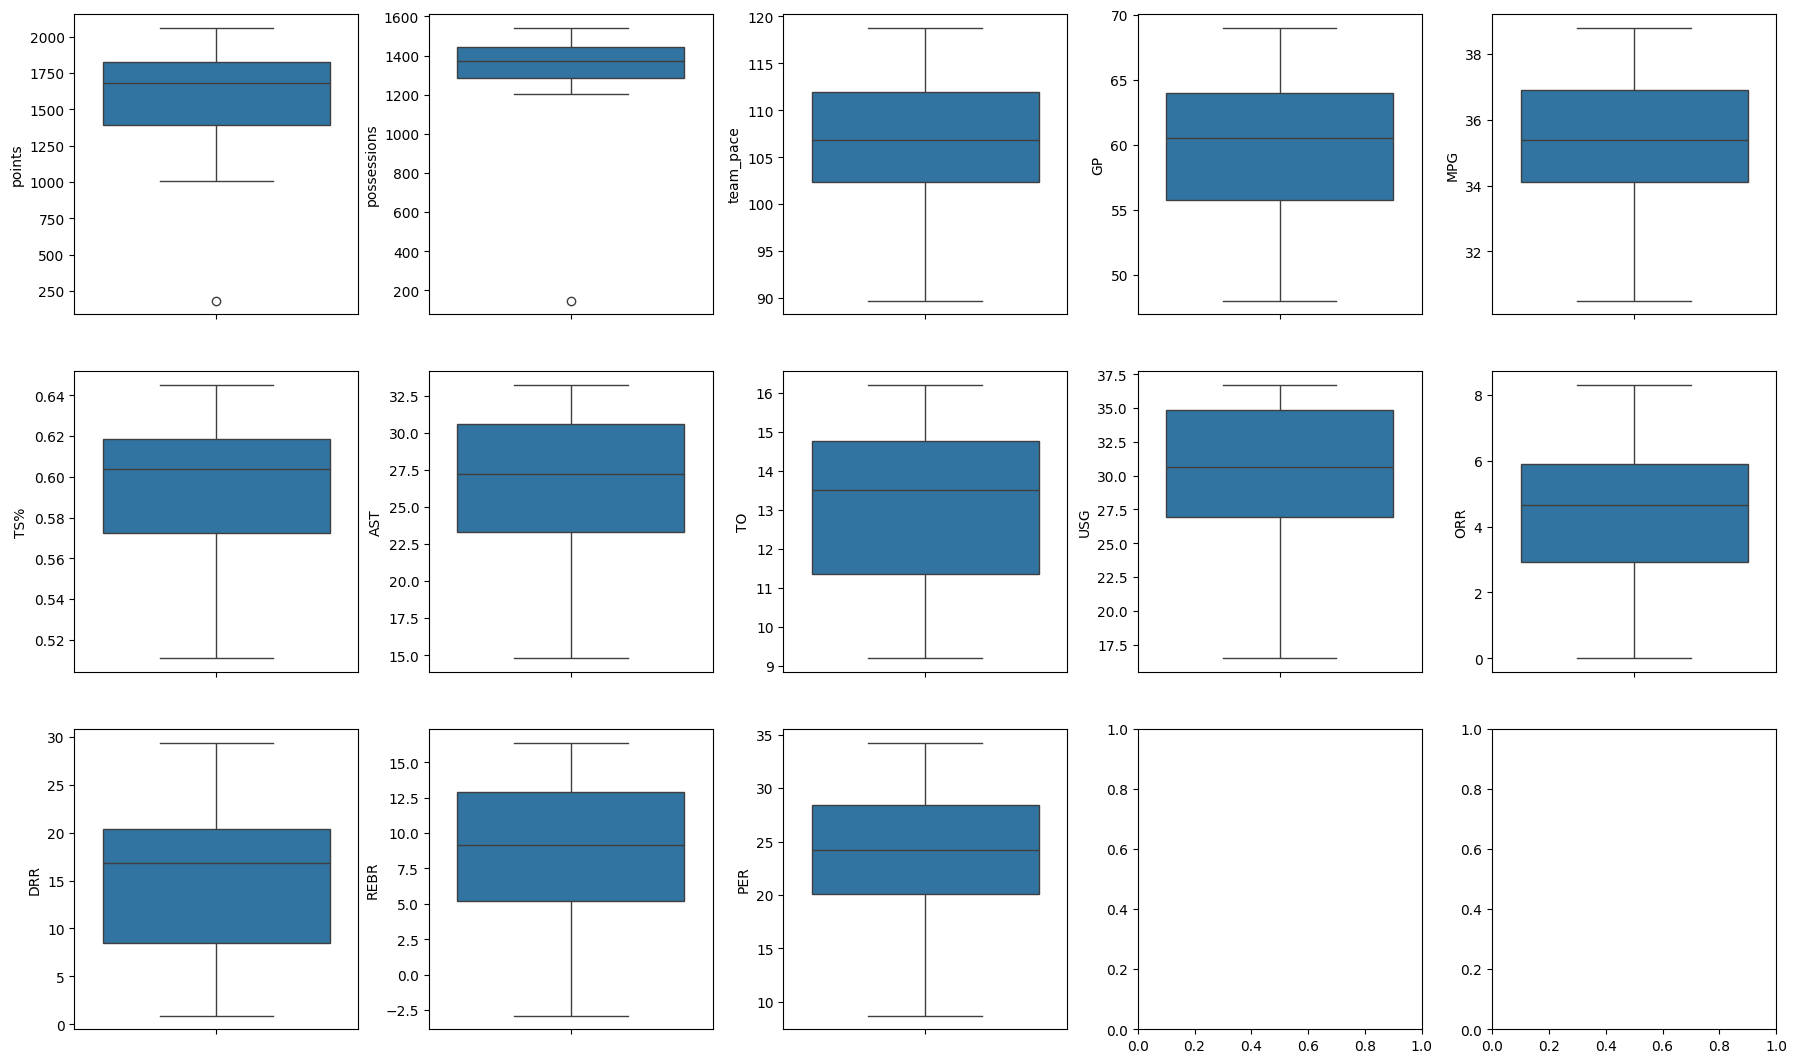

In [14]:
# Create a list of all column names, except for ID.
cols = list(player_df.iloc[:, 1:])

# Create a 3x5 matrix of subplots.
fig, axes = plt.subplots(3, 5, figsize=(18, 11))

# Create padding around subplots to make the axis labels readable.
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a box plot for each one.
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=player_df[cols[i]])

You can see two outliers in points and possessions.

In [15]:
# Identify the index number of the row that has the lowest value in 'possession'.
possession_outlier = player_df['possessions'].idxmin()
possession_outlier

35

In [17]:
# Identify the index number of the row that has the lowest value in 'points'.
points_outlier = player_df['points'].idxmin()
points_outlier

35

In [18]:
# Drop the row that has the outlying values for 'points' and 'possessions'.
player_df.drop(player_df.index[points_outlier], inplace=True)

# Check the end of the DataFrame to ensure that the correct row was dropped.
player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
36,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
37,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
38,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
39,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
40,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
41,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


In [19]:
# Renumber the DataFrame index to reflect the dropped rows.
player_df.reset_index(drop=True, inplace=True)

In [20]:
# Recheck the totals for NaN values by row.
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

Plot

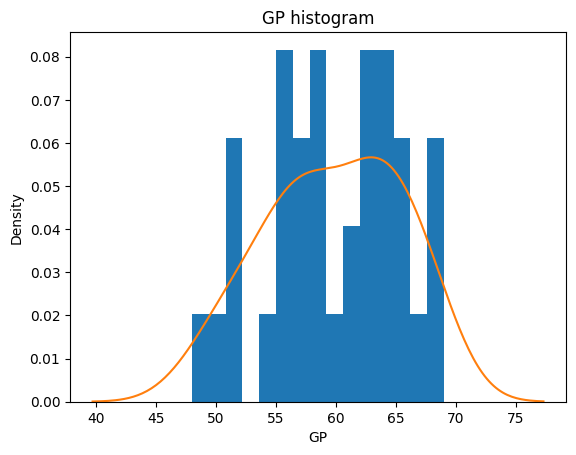

In [21]:
# Plot the KDE for 'GP' over the probability-density histogram.
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

the KDE helps you see that GP's distribution is kind of bell-shaped, and it has a bulge on the right side.

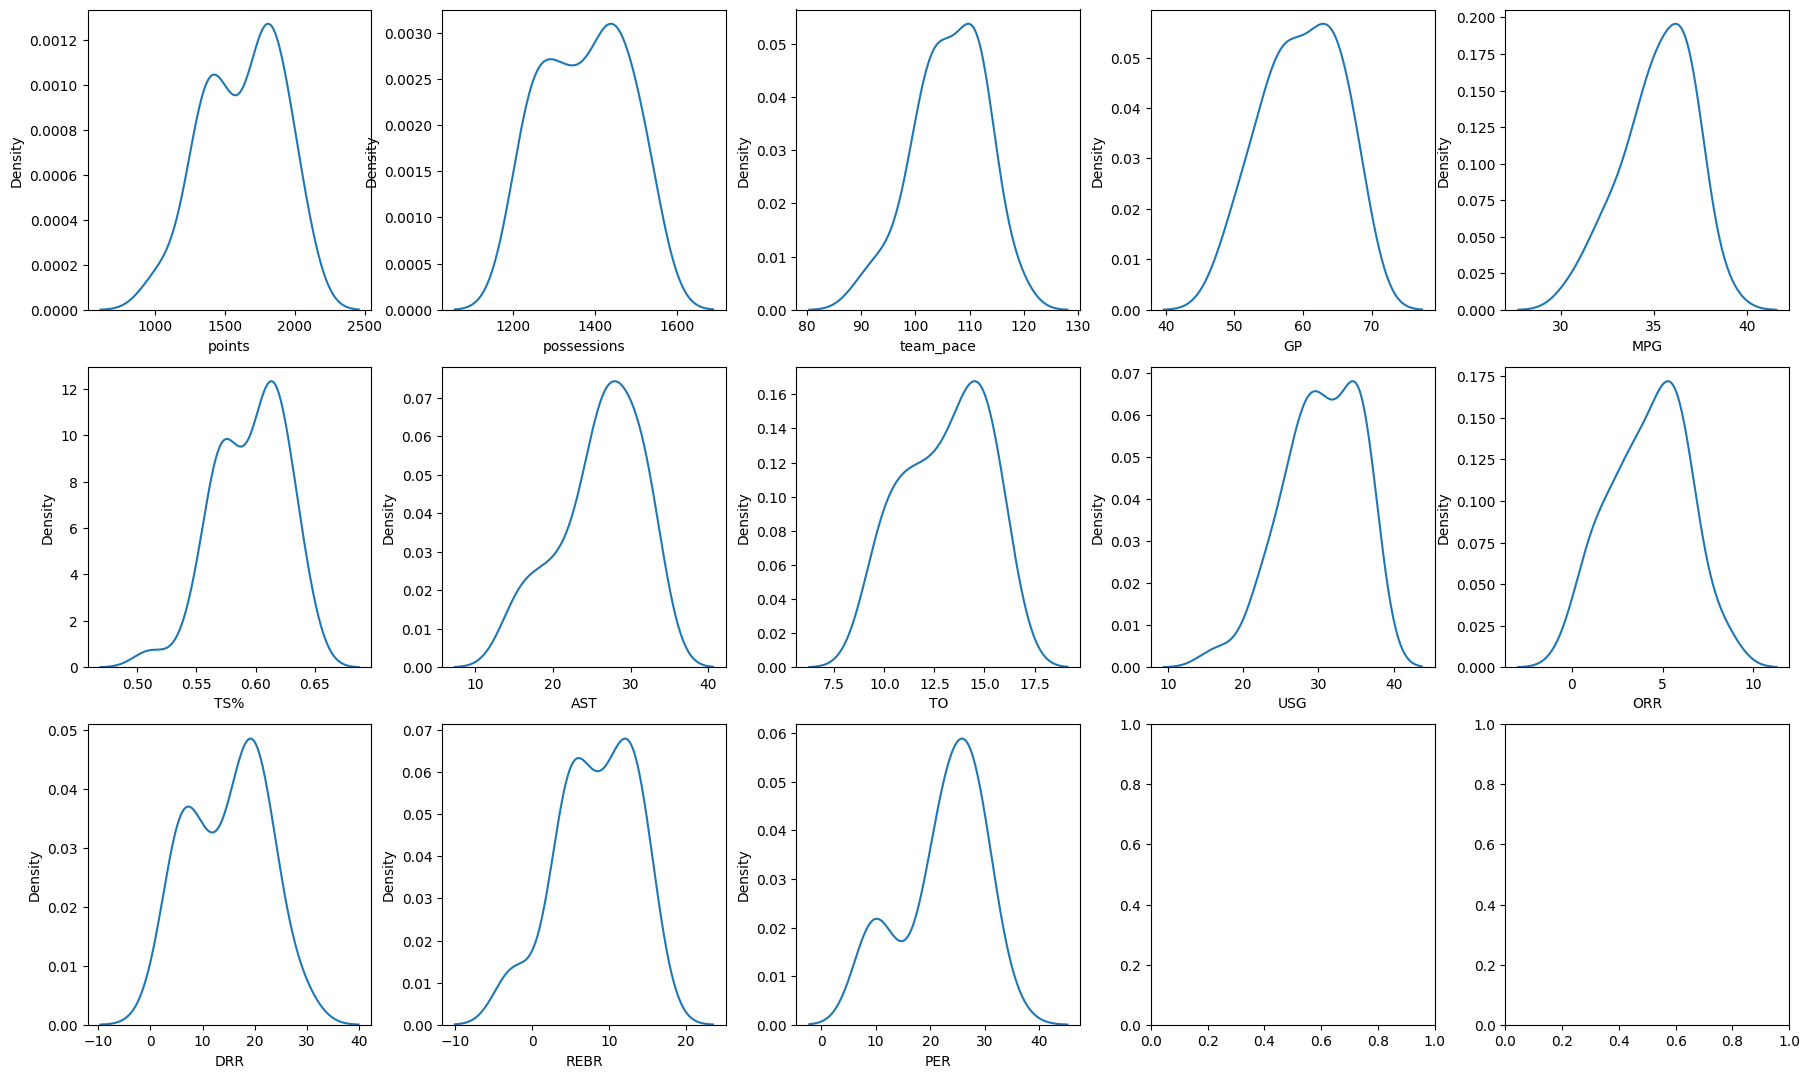

In [22]:
# Create a list of all column names, except for 'ID'.
cols = list(player_df.iloc[:, 1:])

# Create a 3x5 matrix of subplots and add padding around them for readability.
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a KDE for each one.
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//5, i%5], data=player_df[cols[i]])

The fact that so many of the columns are bimodal indicates that the dataset represents samples from two discrete populations

# Data Exploration

The dataset includes a mixture of human basketball players and Tune Squad players. You can take a few of the more distinguished bimodal graphs, for example points, DRR, and PER, and try to differentiate the two populations.

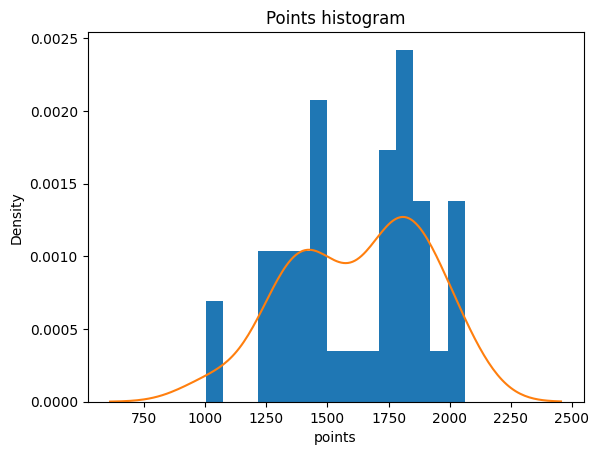

In [23]:
# Plot the KDE for 'points' over the probability-density histogram.
plt.hist(player_df['points'], density=True, bins=15)
plt.title('Points histogram')
sns.kdeplot(player_df['points']);

The rows where players scored more than 1,600 points:

In [24]:
player_df.loc[player_df['points'] >= 1600].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           23 non-null     int64  
 1   points       23 non-null     float64
 2   possessions  23 non-null     float64
 3   team_pace    23 non-null     float64
 4   GP           20 non-null     float64
 5   MPG          20 non-null     float64
 6   TS%          23 non-null     float64
 7   AST          23 non-null     float64
 8   TO           23 non-null     float64
 9   USG          23 non-null     float64
 10  ORR          23 non-null     float64
 11  DRR          23 non-null     float64
 12  REBR         23 non-null     float64
 13  PER          20 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.7 KB


The players who are likely to be part of Tune Squad:

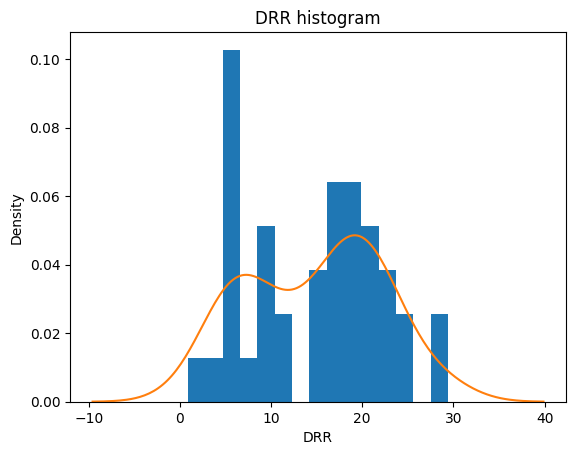

In [25]:
# Plot the KDE for 'DRR' over the probability-density histogram.
plt.hist(player_df['DRR'], density=True, bins=15)
plt.title('DRR histogram')
sns.kdeplot(player_df['DRR']);

Twenty-three rows include players who scored at least 1,600 points.

# Data Manipulation

Make a column to indicate whether a row represents a human or Tune Squad player. Then give each row a unique "name."

In [26]:
# Initialize the list to house the player data.
pop_list = []

# If the ID number is 30 or less, it's a human player; otherwise, it's a Tune Squad player.
for id in player_df['ID']:
    if id <= 30:
        pop_list.append('player'+str(id))
    else:
        pop_list.append('tune_squad'+str(id%30))

pop_list

['player1',
 'player2',
 'player3',
 'player4',
 'player5',
 'player6',
 'player7',
 'player8',
 'player10',
 'player11',
 'player12',
 'player13',
 'player14',
 'player15',
 'player16',
 'player17',
 'player18',
 'player19',
 'player21',
 'player22',
 'player23',
 'player24',
 'player26',
 'player27',
 'player28',
 'player29',
 'tune_squad1',
 'tune_squad2',
 'tune_squad3',
 'tune_squad4',
 'tune_squad5',
 'tune_squad6',
 'tune_squad7',
 'tune_squad8',
 'tune_squad9',
 'tune_squad11',
 'tune_squad12',
 'tune_squad13',
 'tune_squad14',
 'tune_squad15',
 'tune_squad16']

Now add this list of strings to the DataFrame:

In [27]:
# Assign this list as the values for the new player column in the DataFrame.
player_df['player'] = pop_list
player_df.head()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,player
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90,player1
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30,player2
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN,player3
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35,player4
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38,player5


Now use the altered list to specify the order of columns in the player_df DataFrame

In [28]:
# Create list of all DataFrame column names but the last one.
column_list = list(player_df.iloc[:, :-1])

# Make player the second item in the list.
column_list.insert(1, 'player')

# Reassign the columns in the player_df DataFrame in this new order.
player_df = player_df[column_list]

# Verify that the columns are ordered the way you expect.
player_df.head()

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,player2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,player3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,player4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,player5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


# Impute missing values by using average values

To impute the missing values in the normally-enough distributed columns, use the fillna() DataFrame method. In the code, state that you're working with only three of the columns (player_df[['GP','MPG']]). Also state that you want to replace the NaN values in each of those columns with those columns' respective mean values: fillna(value=player_df[['GP','MPG']].mean()). (Once again, stringing together pandas methods makes your job much easier.)

In [29]:
# Replace the missing values in 'GP' and 'MPG' with the mean values of the respective columns.
player_df[['GP','MPG']] = player_df[['GP','MPG']].fillna(value=player_df[['GP','MPG']].mean())

# Recheck the totals for NaN values by row to ensure that the expected missing values are filled in.
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

As player_df.isna().sum() confirmed in the previous unit, only nine missing values remain in PER. You can't use a simple average to impute values in that column. But little domain expertise can help.

It would be nice to build a simple linear regression model to estimate the missing PER values. However, as with any estimate, you have to ask yourself how accurate it is.

The idea is to iterate through the dataset, splitting the data in different ways between training data and test data. Using cross-validation technique multiple times should give you a reasonable idea of how the model will work with new data, even if you have only limited data to work with.

Here you'll use a 10-fold cross validation. That is, Python will iterate through the data 10 times, reserving 10 percent of the data for testing and training on the other 90 percent of the data each time. You'll also plot a histogram of the results.

Mean r2 score: 0.9995
10% of r2 scores are between 0.9985 and 0.9987
10% of r2 scores are between 0.9987 and 0.9988
10% of r2 scores are between 0.9995 and 0.9996
10% of r2 scores are between 0.9996 and 0.9997
60% of r2 scores are between 0.9997 and 0.9998


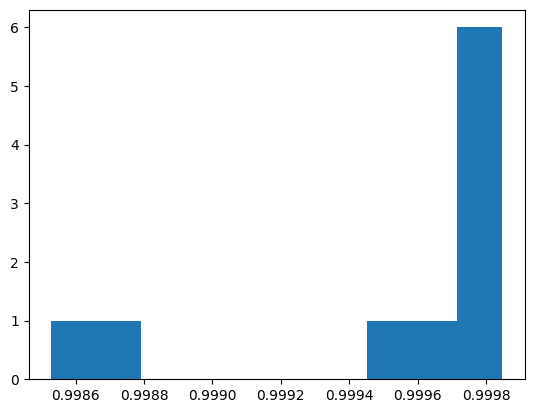

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Define the variables for the regression model as those rows that have no missing values.
X = player_df.dropna(how='any').iloc[:, 5:-1].to_numpy()
y = player_df.dropna(how='any').iloc[:, -1]

# Define the regression model.
lin_reg = LinearRegression()

# Use the scikit-learn cross-validation function to fit this model 10 times and return the R2 scores.
scores = cross_val_score(lin_reg, X, y, cv=10, scoring='r2')

# Define the histogram of the scores and copy out information from the histogram.
entries, bin_edges, patches = plt.hist(scores, bins=10);

# Print out the mean and the results from the histogram.
print('Mean r2 score: {:.4f}'.format(scores.mean()))
for i in range(len(entries)):
    if entries[i] > 0:
        print('{:.0f}% of r2 scores are between {:.4f} and {:.4f}'.format(entries[i]*100/len(entries),
        bin_edges[i],
        bin_edges[i+1]))

In short, your model is good. Your R2 score is 99.95 percent. The R2 (meaning, R squared) score tells you how much data variance your model captures. For your purposes, this score serves as a loose proxy for the model's accuracy. Your lowest R2 scores are still good, and most of them are close to the maximum value of 1. So you should feel confident applying this model to your missing PER values.

Fit model regression for the player data

In [31]:
# Fit the same regression model, this time using all of the available data.
lin_reg.fit(X, y)

LinearRegression()

In [32]:
# Create and display a mask of rows in the DataFrame. Rows should contain at least one NaN value.
mask = player_df.isnull().any(axis=1)
mask

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29     True
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40    False
dtype: bool

In [33]:
# Apply the mask defined earlier to show the contents of specific columns of rows that contain NaN values.
player_df.loc[mask].iloc[:, 5:-1]

,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR
2,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8
7,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2
8,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9
11,59.771429,31.700000,0.584,32.4,14.7,16.5,3.2,19.0,4.1
15,59.771429,34.900000,0.603,26.2,11.1,36.7,3.0,14.3,5.3
20,61.000000,35.208333,0.645,20.6,13.1,31.5,4.0,12.0,5.2
24,48.000000,35.100000,0.569,19.0,10.9,29.2,4.6,17.7,5.2
29,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8
37,64.000000,36.500000,0.618,31.3,14.0,34.9,5.9,21.3,14.5


Now you've identified the nine rows that have a NaN value in the PER column and have the columns that can be used in the machine learning model to predict the PER value.

In [34]:
player_df.to_csv('player_data_final.csv', index=False)